In [1]:
#텐서플로우 1.x -> 2.x 변환 예제
# 1.x 코드
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

node1 = tf.constant(3.0)
node2 = tf.constant(4.0)
node3 = tf.add(node1, node2)
sess = tf.Session()

print(sess.run([node1, node2]))
print(sess.run(node3))

sess.close()

Instructions for updating:
non-resource variables are not supported in the long term
[3.0, 4.0]
7.0


In [6]:
import tensorflow.compat.v1 as tf
tf.compat.v1.disable_v2_behavior()

#x, y의 데이터 값
data = [[2, 81], [4, 93], [6, 91], [8, 97]]
x_data = [x_row[0] for x_row in data]
y_data = [y_row[1] for y_row in data]

#기울기 a와 y절편 b의 값을 임의로 정한다
#단, 기울기의 범위는 0 ~ 10 사이이며, y 절편은 0 ~ 100 사이에서 변하게 한다
#random_uniform(데이터 형태, 시작값, 끝값, 데이터 타입, 기본값)
#seed : 랜덤한 값을 만들때 정확하게 돌아가는지 확인하는 용도
a = tf.Variable(tf.random_uniform([1], 0, 10, dtype = tf.float64, seed = 0))
b = tf.Variable(tf.random_uniform([1], 0, 100, dtype = tf.float64, seed = 0))

#y에 대한 일차 방정식 ax + b의 식을 세운다
y = a * x_data + b

#텐서플로 RMSE함수
rmse = tf.sqrt(tf.reduce_mean(tf.square(y - y_data)))

#학습률 값
learning_rate = 0.1

#RMSE 값을 최소로 하는 값 찾기
                  #오차를 최소화하는데 그 훈련 방법이 경사하강법이다
gradient_decent = tf.train.GradientDescentOptimizer(learning_rate).minimize(rmse)
                  #a, b를 오차가 최소화 하는 방향으로 갱신

#텐서플로를 이용한 학습
with tf.Session() as sess:    #close 자동
    #변수 초기화
    #global_variables_initializer()를 이용하여 variable로 입력된 a,b를 사용할 수 있게 하였다
    sess.run(tf.global_variables_initializer())
    
    #2001번 실행(0번째를 포함하므로)
    #a, b를 오차가 최소화하는 방향을 찾기 위해 2000번 갱신하였다
    for step in range(2001):
        sess.run(gradient_decent)
        
        #100번마다 결과 출력
        if step % 100 == 0:
            print("Epoch: %.f, RMSE = %.04f, 기울기 a = %.4f, y절편 b = %.4f" %(step, sess.run(rmse), sess.run(a), sess.run(b)))

Epoch: 0, RMSE = 30.2139, 기울기 a = 7.5235, y절편 b = 80.5984
Epoch: 100, RMSE = 2.8860, 기울기 a = 2.2299, y절편 b = 79.4181
Epoch: 200, RMSE = 2.8826, 기울기 a = 2.2601, y절편 b = 79.2379
Epoch: 300, RMSE = 2.8815, 기울기 a = 2.2773, y절편 b = 79.1353
Epoch: 400, RMSE = 2.8811, 기울기 a = 2.2871, y절편 b = 79.0770
Epoch: 500, RMSE = 2.8810, 기울기 a = 2.2927, y절편 b = 79.0438
Epoch: 600, RMSE = 2.8810, 기울기 a = 2.2958, y절편 b = 79.0249
Epoch: 700, RMSE = 2.8810, 기울기 a = 2.2976, y절편 b = 79.0142
Epoch: 800, RMSE = 2.8810, 기울기 a = 2.2987, y절편 b = 79.0081
Epoch: 900, RMSE = 2.8810, 기울기 a = 2.2992, y절편 b = 79.0046
Epoch: 1000, RMSE = 2.8810, 기울기 a = 2.2996, y절편 b = 79.0026
Epoch: 1100, RMSE = 2.8810, 기울기 a = 2.2998, y절편 b = 79.0015
Epoch: 1200, RMSE = 2.8810, 기울기 a = 2.2999, y절편 b = 79.0008
Epoch: 1300, RMSE = 2.8810, 기울기 a = 2.2999, y절편 b = 79.0005
Epoch: 1400, RMSE = 2.8810, 기울기 a = 2.3000, y절편 b = 79.0003
Epoch: 1500, RMSE = 2.8810, 기울기 a = 2.3000, y절편 b = 79.0002
Epoch: 1600, RMSE = 2.8810, 기울기 a = 2.3000, y절편 b =

In [4]:
#코딩으로 확인하는 경사하강법 - 실습1
#A = 0.1756, B = -0.0339 나와야 된다
import tensorflow.compat.v1 as tf
tf.compat.v1.disable_v2_behavior()

data =[[1, 0.2], [2, 0.3], [3, 0.5], [4, 0.6], [5, 0.9], [6, 0.95], [7, 1.1], [8, 1.5]]
x_data = [i[0] for i in data]
y_data = [i[1] for i in data]

a = tf.Variable(tf.random_uniform([1], 0, 1, dtype=tf.float64, seed=0))
b = tf.Variable(tf.random_uniform([1], 0, 1, dtype=tf.float64, seed=0))#0,10으로 해도 같은 결과 나온다

y = a * x_data + b

learning_rate = 0.001

rmse = tf.sqrt(tf.reduce_mean(tf.square( y - y_data )))
tensor_edge = tf.train.GradientDescentOptimizer(learning_rate).minimize(rmse)

with tf.Session() as sess:
  sess.run(tf.global_variables_initializer())

  for i in range(50001):
    sess.run(tensor_edge)

    if i%5000 == 0:
      print("epoch = %.4f, rmse = %.4f, 기울기 a = %.4f, 절편 b = %.4f"%(i, sess.run(rmse), sess.run(a), sess.run(b)))

epoch = 0.0000, rmse = 3.9302, 기울기 a = 0.8019, 절편 b = 0.8060
epoch = 5000.0000, rmse = 0.0726, 기울기 a = 0.1756, 절편 b = -0.0339
epoch = 10000.0000, rmse = 0.0726, 기울기 a = 0.1756, 절편 b = -0.0339
epoch = 15000.0000, rmse = 0.0726, 기울기 a = 0.1756, 절편 b = -0.0339
epoch = 20000.0000, rmse = 0.0726, 기울기 a = 0.1756, 절편 b = -0.0339
epoch = 25000.0000, rmse = 0.0726, 기울기 a = 0.1756, 절편 b = -0.0339
epoch = 30000.0000, rmse = 0.0726, 기울기 a = 0.1756, 절편 b = -0.0339
epoch = 35000.0000, rmse = 0.0726, 기울기 a = 0.1756, 절편 b = -0.0339
epoch = 40000.0000, rmse = 0.0726, 기울기 a = 0.1756, 절편 b = -0.0339
epoch = 45000.0000, rmse = 0.0726, 기울기 a = 0.1756, 절편 b = -0.0339
epoch = 50000.0000, rmse = 0.0726, 기울기 a = 0.1756, 절편 b = -0.0339


epoch = 0.0000, rmse = 155.4207, 기울기 a = 0.7846, 절편 b = 12.2965
epoch = 50000.0000, rmse = 4.2062, 기울기 a = 0.0891, 절편 b = 12.1153
epoch = 100000.0000, rmse = 4.2020, 기울기 a = 0.0897, 절편 b = 11.9698
epoch = 150000.0000, rmse = 4.1992, 기울기 a = 0.0902, 절편 b = 11.8511
epoch = 200000.0000, rmse = 4.1973, 기울기 a = 0.0906, 절편 b = 11.7544
epoch = 250000.0000, rmse = 4.1960, 기울기 a = 0.0909, 절편 b = 11.6757
epoch = 300000.0000, rmse = 4.1952, 기울기 a = 0.0912, 절편 b = 11.6115
epoch = 350000.0000, rmse = 4.1947, 기울기 a = 0.0914, 절편 b = 11.5593
epoch = 400000.0000, rmse = 4.1943, 기울기 a = 0.0915, 절편 b = 11.5167
epoch = 450000.0000, rmse = 4.1941, 기울기 a = 0.0917, 절편 b = 11.4821
epoch = 500000.0000, rmse = 4.1939, 기울기 a = 0.0918, 절편 b = 11.4539
epoch = 550000.0000, rmse = 4.1938, 기울기 a = 0.0919, 절편 b = 11.4309
epoch = 600000.0000, rmse = 4.1937, 기울기 a = 0.0920, 절편 b = 11.4122
epoch = 650000.0000, rmse = 4.1937, 기울기 a = 0.0920, 절편 b = 11.3970
epoch = 700000.0000, rmse = 4.1936, 기울기 a = 0.0921, 절편 b = 11.3846

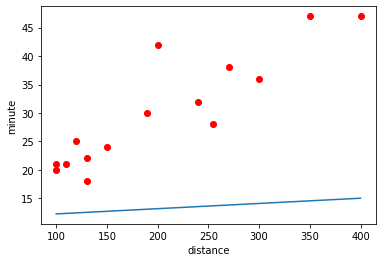

In [5]:
#a = 0.0922, b = 11.34근사값
import tensorflow.compat.v1 as tf
tf.compat.v1.disable_v2_behavior()

data = [[100,20], [150,24], [300,36], [400,47], [130,22], [240,32], [350,47], [200,42], [100,21], [110,21], [190,30], [120,25], [130,18], [270,38], [255,28]]
x_data = [i[0] for i in data]
y_data = [i[1] for i in data]

a = tf.Variable(tf.random_uniform([1], 0, 1, dtype = tf.float64, seed=0))
b = tf.Variable(tf.random_uniform([1], 1, 15, dtype = tf.float64, seed=0))

y = a*x_data + b

learning_rate = 0.0001
                
rmse = tf.sqrt(tf.reduce_mean(tf.square(y - y_data)))
gradient_descent = tf.train.GradientDescentOptimizer(learning_rate).minimize(rmse)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for i in range(1000001):
        sess.run(gradient_descent)
        
        if i%50000 == 0:
            print("epoch = %.4f, rmse = %.4f, 기울기 a = %.4f, 절편 b = %.4f"%(i, sess.run(rmse), sess.run(a), sess.run(b)))

#위의 결과를 그래프로 나타내기
pred_y = []
for i in x_data:
  y = 0.0092 * i + 11.33
  print(y)
  pred_y.append(y)

import matplotlib.pyplot as plt
#그래프를 그린다
#plt.plot(pred_y, pred_y, 'r-')
plt.plot(x_data, y_data, 'ro')
plt.plot([min(x_data), max(x_data)], [min(pred_y), max(pred_y)])

plt.xlabel('distance')
plt.ylabel('minute')
plt.show()